I used https://www.kaggle.com/masonblier/aerial-cactus-simple-cnn, https://towardsdatascience.com/image-classification-python-keras-tutorial-kaggle-challenge-45a6332a58b8, and https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py to help get me started. 

In [1]:
import numpy as np
import pandas as pd
from PIL import Image
import os
import imageio
from random import shuffle
import matplotlib.pyplot as plt
import os
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from keras.applications.vgg16 import VGG16
from keras.optimizers import Adam




Using TensorFlow backend.


In [2]:
def label_img(name):
    word_label = name.split('-')[1]
    if word_label == 'Cactus': return 1
    elif word_label == 'NoCactus' : return 0

In [3]:

def load_training_data():
    train_load = []
    
    for img in os.listdir('../input/labeled-training-images/labeled_train/labeled_train'):
        strippedName = img.split('.')[0]
        label = label_img(strippedName)
        path = os.path.join('../input/labeled-training-images/labeled_train/labeled_train', img)
        if "DS_Store" not in path:
            img = Image.open(path)
            train_load.append([np.array(img), label])
           
            
    shuffle(train_load)
    return train_load

In [4]:
train_data = load_training_data()

trainImage = np.array([i[0] for i in train_data]).reshape(-1, 32, 32, 3)
trainLabels = np.array([i[1] for i in train_data])
trainLabels = keras.utils.to_categorical(trainLabels, 2)
trainImage  = trainImage/255

In [5]:

# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
    #rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=.15)

# this is the augmentation configuration we will use for validation:

val_datagen = ImageDataGenerator( shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

In [6]:
trainImage, valImage,trainLabels,  valLabels = train_test_split(trainImage, trainLabels, test_size=.2, random_state=30)

In [7]:
train_generator = train_datagen.flow(trainImage, trainLabels, batch_size=32)
val_generator = val_datagen.flow(valImage, valLabels, batch_size=32)

In [8]:
base=VGG16(include_top=False, weights='../input/vgg16/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5',input_shape=(32,32,3))
#print(os.listdir("../input/vgg16"))

Instructions for updating:
Colocations handled automatically by placer.


In [9]:
model = Sequential()
# model.add(Conv2D(32, kernel_size=(3, 3),
#                  activation='relu',
#                  input_shape=(32,32,3)))
model.add(base)
model.add(Flatten())
# model.add(Conv2D(128, (3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))
# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))
# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))
# model.add(Flatten())


model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(2, activation='softmax'))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [10]:
il = len(valImage)


In [11]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=1e-5), metrics = ['accuracy'])

In [12]:
#model.fit(trainImage, trainLabels, epochs = 15, verbose = 1, validation_split=.15)
#model.fit_generator(train_generator, steps_per_epoch=17500//16, verbose=1)
history = model.fit_generator(train_generator,validation_data = val_generator,validation_steps = len(valImage)/32,
                              steps_per_epoch=len(trainImage)/32, epochs=500)

Instructions for updating:
Use tf.cast instead.
Epoch 1/500
438/437 [==============================] - 18s 40ms/step - loss: 0.2107 - acc: 0.9025 - val_loss: 0.0470 - val_acc: 0.9829
Epoch 2/500
438/437 [==============================] - 13s 29ms/step - loss: 0.0597 - acc: 0.9805 - val_loss: 0.0480 - val_acc: 0.9840
Epoch 3/500
438/437 [==============================] - 13s 29ms/step - loss: 0.0404 - acc: 0.9876 - val_loss: 0.0428 - val_acc: 0.9866
Epoch 4/500
438/437 [==============================] - 13s 30ms/step - loss: 0.0368 - acc: 0.9879 - val_loss: 0.0233 - val_acc: 0.9917
Epoch 5/500
438/437 [==============================] - 13s 29ms/step - loss: 0.0292 - acc: 0.9902 - val_loss: 0.0336 - val_acc: 0.9889
Epoch 6/500
438/437 [==============================] - 13s 29ms/step - loss: 0.0247 - acc: 0.9919 - val_loss: 0.0603 - val_acc: 0.9811
Epoch 7/500
438/437 [==============================] - 13s 29ms/step - loss: 0.0210 - acc: 0.9928 - val_loss: 0.0346 - val_acc: 0.9911
Epoch 8

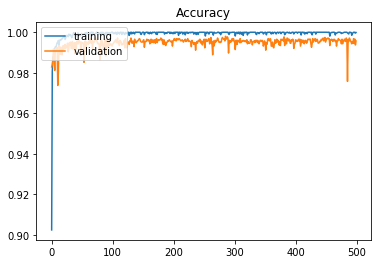

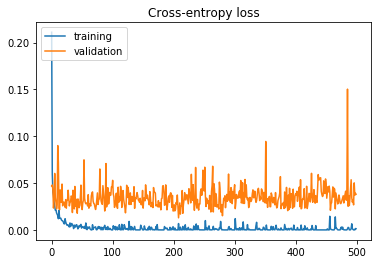

In [13]:

def plot_accuracies_and_losses(history):
    plt.title('Accuracy')
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.legend(['training', 'validation'], loc='upper left')
    plt.show()
    
    plt.title('Cross-entropy loss')
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.legend(['training', 'validation'], loc='upper left')
    plt.show()

plot_accuracies_and_losses(history)

In [14]:
def load_test_data():
    test_data = []
    names =[]
    for img in os.listdir("../input/aerial-cactus-identification/test/test"):
        name = img
        path = os.path.join("../input/aerial-cactus-identification/test/test", img)
        if "DS_Store" not in path:
            img = Image.open(path)
            test_data.append([np.array(img)])
            names.append(name)
            
    
    return (test_data, names)

In [15]:

(test_data, names) = load_test_data()

testImages = np.array([i[0] for i in test_data]).reshape(-1, 32, 32, 3)
testImages = testImages/255

In [16]:
results = model.predict_classes(testImages)

In [17]:

df = pd.DataFrame({'id':names,'has_cactus': results})
df.index.name='id'

df.to_csv("keras_results.csv", index=False)